# Retail Industry Data Cleaning

Columns description - Sales:
- **MonthYear**: Date
- **Time index**: Month-Year ID
- **Country**: Country of the store
- **StoreID**: Store ID
- **City**: Name of the store by city and internal number
- **Dept_ID**: Store department ID
- **Dept. Name**: Department name
- **HoursOwn**: Number of hours worked by internal emplyees
- **HoursLease**: Hours worked by external employees
- **Sales units**: Number of sales
- **Turnover**: Revenue (that month)
- **Customer**: Number of customers (that month)
- **Área (m2)**: Department area
- **Opening hours**: Opening hours scheme

## Importing and reading files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

In [2]:
# Estilo global de Matplotlib
plt.style.use('ggplot')  

# Ajustes de configuración
plt.rcParams.update({
    'figure.figsize': (10, 6),        # Tamaño estándar de las figuras
    'axes.titlesize': 16,             # Tamaño de título de los ejes
    'axes.labelsize': 14,             # Tamaño de etiquetas de los ejes
    'xtick.labelsize': 12,            # Tamaño de etiquetas de las marcas de los ejes
    'ytick.labelsize': 12,
    'legend.fontsize': 12,            # Tamaño de fuente de la leyenda
    'axes.titleweight': 'bold',       # Negrita en los títulos de los ejes
    'axes.labelweight': 'bold',       # Negrita en las etiquetas de los ejes
    'axes.spines.top': False,         # Quita el borde superior
    'axes.spines.right': False,       # Quita el borde derecho
    'figure.dpi': 100,                # Resolución
    'savefig.dpi': 300,               # Resolución para guardar figuras
    'figure.autolayout': True,        # Ajuste automático de la figura para evitar superposición
})

# Configuración de estilo de Seaborn
sns.set_theme(
    style="darkgrid",                # Fondo con cuadrícula blanca
    palette="deep",                   # Paleta de colores vistosa
    font="sans-serif",                # Fuente general
    font_scale=1.1                    # Escala de tamaño de fuente
)

# Personalización adicional (para mejorar el contraste)
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})

In [3]:
path = r'C:\Users\mateo\OneDrive\Escritorio\Ciencia de datos\Proyectos\Retail Industry Cleaning\salesworkload.xlsx'

In [4]:
# There is a single Excel file with two sheets containing data.
sales = pd.read_excel(path, sheet_name= 0)
openings = pd.read_excel(path, sheet_name= 1)

In [5]:
sales.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,MonthYear,Time index,Country,StoreID,City,Dept_ID,Dept. Name,HoursOwn,HoursLease,Sales units,Turnover,Customer,Area (m2),Opening hours
1,10.2016,1,United Kingdom,88253,London (I),1,Dry,3184.764,0,398560,1226244,NaN,953.04,Type A
2,10.2016,1,United Kingdom,88253,London (I),2,Frozen,1582.941,0,82725,387810,NaN,720.48,Type A
3,10.2016,1,United Kingdom,88253,London (I),3,other,47.205,0,438400,654657,NaN,966.72,Type A
4,10.2016,1,United Kingdom,88253,London (I),4,Fish,1623.852,0,309425,499434,NaN,1053.36,Type A



We set the headers and apply lowercase to everything for better handling. Additionally, spaces are replaced with underscores.


In [6]:
sales.columns = sales.iloc[0]
sales = sales[1:]

In [7]:
sales.columns = sales.columns.str.lower().str.replace(' ', '_')

In [8]:
sales.tail()

,monthyear,time_index,country,storeid,city,dept_id,dept._name,hoursown,hourslease,sales_units,turnover,customer,area_(m2),opening_hours
7654,06.2017,9,Sweden,29650,Gothenburg,12,Checkout,6322.323,0,3886530,14538825,NaN,#NV,Type A
7655,06.2017,9,Sweden,29650,Gothenburg,16,Customer Services,4270.479,0,245,0,NaN,#NV,Type A
7656,06.2017,9,Sweden,29650,Gothenburg,11,Delivery,0,0,0,0,NaN,#NV,Type A
7657,06.2017,9,Sweden,29650,Gothenburg,17,others,2224.929,0,245,0,NaN,#NV,Type A
7658,06.2017,9,Sweden,29650,Gothenburg,18,all,39652.2,0,3886530,15056214,NaN,#NV,Type A


In [9]:
sales.dtypes

0
monthyear        object
time_index       object
country          object
storeid          object
city             object
dept_id          object
dept._name       object
hoursown         object
hourslease       object
sales_units      object
turnover         object
customer         object
area_(m2)        object
opening_hours    object
dtype: object

In [10]:
sales.describe()

,monthyear,time_index,country,storeid,city,dept_id,dept._name,hoursown,hourslease,sales_units,turnover,customer,area_(m2),opening_hours
count,7658,7650,7650,7650,7650,7650,7650,7650.000,7650,7650,7650,0,7650,7650
unique,10,9,11,50,50,17,17,3505.000,223,5658,5904,0,2826,3
top,10.2016,1,United Kingdom,88253,London (I),1,Dry,47.205,0,0,0,NaN,0,Type A
freq,850,850,918,153,153,450,450,450.000,7172,157,1480,NaN,1600,5661


## Format correction

In [11]:
sales['monthyear'].unique()

array(['10.2016', ' - - - - ', '11.2016', '12.2016', '01.2017', '02.2017',
       '03.2017', '04.2017', '05.2017', '06.2017'], dtype=object)

In [12]:
sales[sales['monthyear'] == ' - - - - ']

,monthyear,time_index,country,storeid,city,dept_id,dept._name,hoursown,hourslease,sales_units,turnover,customer,area_(m2),opening_hours
851,- - - -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1702,- - - -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2553,- - - -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3404,- - - -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4255,- - - -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5106,- - - -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5957,- - - -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6808,- - - -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



There is a set of empty rows. They are being deleted. These are the 8 extra rows we found when using 'describe()'

In [13]:
sales = sales[sales['monthyear'] != ' - - - - ']

In [14]:
# Setting the datetime format
sales['monthyear'] = pd.to_datetime(sales['monthyear'], format= '%m.%Y')

In [15]:
sales['date'] = sales['monthyear'].dt.strftime('%B %Y')

In [16]:
sales.head()

,monthyear,time_index,country,storeid,city,dept_id,dept._name,hoursown,hourslease,sales_units,turnover,customer,area_(m2),opening_hours,date
1,2016-10-01,1,United Kingdom,88253,London (I),1,Dry,3184.764,0,398560,1226244,NaN,953.04,Type A,October 2016
2,2016-10-01,1,United Kingdom,88253,London (I),2,Frozen,1582.941,0,82725,387810,NaN,720.48,Type A,October 2016
3,2016-10-01,1,United Kingdom,88253,London (I),3,other,47.205,0,438400,654657,NaN,966.72,Type A,October 2016
4,2016-10-01,1,United Kingdom,88253,London (I),4,Fish,1623.852,0,309425,499434,NaN,1053.36,Type A,October 2016
5,2016-10-01,1,United Kingdom,88253,London (I),5,Fruits & Vegetables,1759.173,0,165515,329397,NaN,1053.36,Type A,October 2016


In [17]:
sales = sales.drop('monthyear', axis= 1)


The month identifier is not necessary for our analysis, so we will store it in a separate dataframe along with its corresponding data for future reference.


In [18]:
month_id = sales[['time_index', 'date']].drop_duplicates().sort_values('time_index')

In [19]:
month_id['time_index'] = pd.to_numeric(month_id['time_index'])

In [20]:
month_id

,time_index,date
1,1,October 2016
852,2,November 2016
1703,3,December 2016
2554,4,January 2017
3405,5,February 2017
4256,6,March 2017
5107,7,April 2017
5958,8,May 2017
6809,9,June 2017


In [21]:
sales = sales[sales.columns[1:]]

In [22]:
sales.storeid.unique()

array([88253, 38976, 17647, 22117, 73949, 18808, 71991, 86208, 23623,
       19769, 15552, 95434, 93033, 85321, 38560, 20891, 45583, 85696,
       32949, 96857, 87703, 19000, 88994, 20166, 16927, 96493, 88750,
       78450, 94153, 64983, 77348, 78325, 83160, 12227, 94882, 34378,
       42367, 86089, 98422, 79785, 63354, 85124, 73422, 91973, 19340,
       76852, 73762, 81473, 90992, 29650], dtype=object)

In [23]:
sales['storeid'] = pd.to_numeric(sales['storeid'])

In [24]:
sales[['city', 'store_number_dis']] = sales['city'].str.split('(', expand=True)

In [25]:
sales['city'] = sales['city'].str.strip()
sales['store_number_dis'] = sales['store_number_dis'].str.strip().str.strip(')')

In [26]:
sales.insert(3, 'store_number', sales['store_number_dis'])

In [27]:
sales = sales.drop('store_number_dis', axis= 1)

In [28]:
sales['store_number'] = sales['store_number'].fillna('Unique')

In [29]:
sales.head()

,country,storeid,city,store_number,dept_id,dept._name,hoursown,hourslease,sales_units,turnover,customer,area_(m2),opening_hours,date
1,United Kingdom,88253,London,I,1,Dry,3184.764,0,398560,1226244,NaN,953.04,Type A,October 2016
2,United Kingdom,88253,London,I,2,Frozen,1582.941,0,82725,387810,NaN,720.48,Type A,October 2016
3,United Kingdom,88253,London,I,3,other,47.205,0,438400,654657,NaN,966.72,Type A,October 2016
4,United Kingdom,88253,London,I,4,Fish,1623.852,0,309425,499434,NaN,1053.36,Type A,October 2016
5,United Kingdom,88253,London,I,5,Fruits & Vegetables,1759.173,0,165515,329397,NaN,1053.36,Type A,October 2016


In [30]:
sales = sales.rename(columns= {'dept._name': 'dept_name'})

In [31]:
sales['dept_id'] = pd.to_numeric(sales['dept_id'])

### Hours

'hourown' cannot be converted to a numeric format because it contains some entries that are not numbers. Let's identify those entries


In [32]:
sales['hoursown_fixed'] = pd.to_numeric(sales['hoursown'], errors='coerce')

In [33]:
sales[sales['hoursown_fixed'].isnull()]

,country,storeid,city,store_number,dept_id,dept_name,hoursown,hourslease,sales_units,turnover,customer,area_(m2),opening_hours,date,hoursown_fixed
2967,Spain,16927,Barcelona,I,6,Meat,?,0,1799675,5557959,NaN,8408.64,Type A,January 2017,NaN
5890,Belgium,73762,Antwerp,Unique,2,Frozen,?,0,189930,1335069,NaN,627,Type A,April 2017,NaN


In [34]:
sales[(sales['city'] == 'Barcelona') & (sales['dept_name'] == 'Meat') & (sales['store_number'] == 'I')]

,country,storeid,city,store_number,dept_id,dept_name,hoursown,hourslease,sales_units,turnover,customer,area_(m2),opening_hours,date,hoursown_fixed
414,Spain,16927,Barcelona,I,6,Meat,8629.074,0,1944590,6615339,NaN,8310.6,Type A,October 2016,8629.074
1265,Spain,16927,Barcelona,I,6,Meat,9198.681,0,2641215,8613465,NaN,8007.36,Type A,November 2016,9198.681
2116,Spain,16927,Barcelona,I,6,Meat,9979.137,0,2873570,9228366,NaN,8360.76,Type A,December 2016,9979.137
2967,Spain,16927,Barcelona,I,6,Meat,?,0,1799675,5557959,NaN,8408.64,Type A,January 2017,NaN
3818,Spain,16927,Barcelona,I,6,Meat,8660.544,0,1589640,6174309,NaN,8039.28,Type A,February 2017,8660.544
4669,Spain,16927,Barcelona,I,6,Meat,8773.836,0,1923505,6389361,NaN,7941.24,Type A,March 2017,8773.836
5520,Spain,16927,Barcelona,I,6,Meat,8377.314,0,2270300,7021083,NaN,8089.44,Type A,April 2017,8377.314
6371,Spain,16927,Barcelona,I,6,Meat,9381.207,0,2053420,6941883,NaN,8255.88,Type A,May 2017,9381.207
7222,Spain,16927,Barcelona,I,6,Meat,8367.873,0,1908040,6813732,NaN,#NV,Type A,June 2017,8367.873


As we can see in the first case, the hours are very similar across all months, so we will populate this value. In this case, I consider it more appropriate to use the median to fill the cell, as the hours in cell 2116 act as an outlier for the mean.

In [35]:
mediana1 = sales[(sales['city'] == 'Barcelona') & (sales['dept_name'] == 'Meat') & (sales['store_number'] == 'I')]['hoursown_fixed'].median()

In [36]:
sales.loc[2967, 'hoursown_fixed'] = mediana1

Let's see the case for the Belgium entry

In [37]:
sales[(sales['city'] == 'Antwerp') & (sales['dept_name'] == 'Frozen')]

,country,storeid,city,store_number,dept_id,dept_name,hoursown,hourslease,sales_units,turnover,customer,area_(m2),opening_hours,date,hoursown_fixed
784,Belgium,73762,Antwerp,Unique,2,Frozen,2426.337,0,182250,1127841,NaN,679.44,Type A,October 2016,2426.337
1635,Belgium,73762,Antwerp,Unique,2,Frozen,3502.611,0,196295,1226718,NaN,665.76,Type A,November 2016,3502.611
2486,Belgium,73762,Antwerp,Unique,2,Frozen,3052.59,0,294060,1949532,NaN,627,Type A,December 2016,3052.590
3337,Belgium,73762,Antwerp,Unique,2,Frozen,2838.594,0,139440,931953,NaN,627,Type A,January 2017,2838.594
4188,Belgium,73762,Antwerp,Unique,2,Frozen,2753.625,0,166370,1074981,NaN,640.68,Type A,February 2017,2753.625
5039,Belgium,73762,Antwerp,Unique,2,Frozen,2854.329,0,193010,1196646,NaN,647.52,Type A,March 2017,2854.329
5890,Belgium,73762,Antwerp,Unique,2,Frozen,?,0,189930,1335069,NaN,627,Type A,April 2017,NaN
6741,Belgium,73762,Antwerp,Unique,2,Frozen,2772.507,0,181065,1155267,NaN,658.92,Type A,May 2017,2772.507
7592,Belgium,73762,Antwerp,Unique,2,Frozen,2398.014,0,164835,1112340,NaN,#NV,Type A,June 2017,2398.014


In [38]:
mediana2 = sales[(sales['city'] == 'Antwerp') & (sales['dept_name'] == 'Frozen')]['hoursown_fixed'].median()

We are going to take the median too

In [39]:
sales.reset_index(drop= True, inplace= True)

In [40]:
sales.loc[5883,'hoursown_fixed'] = mediana2

In [41]:
sales = sales.drop('hoursown', axis= 1)
sales.insert(6, 'hoursown', sales['hoursown_fixed'].round(2))
sales = sales.drop('hoursown_fixed', axis= 1)

In [42]:
sales.head()

,country,storeid,city,store_number,dept_id,dept_name,hoursown,hourslease,sales_units,turnover,customer,area_(m2),opening_hours,date
0,United Kingdom,88253,London,I,1,Dry,3184.76,0,398560,1226244,NaN,953.04,Type A,October 2016
1,United Kingdom,88253,London,I,2,Frozen,1582.94,0,82725,387810,NaN,720.48,Type A,October 2016
2,United Kingdom,88253,London,I,3,other,47.20,0,438400,654657,NaN,966.72,Type A,October 2016
3,United Kingdom,88253,London,I,4,Fish,1623.85,0,309425,499434,NaN,1053.36,Type A,October 2016
4,United Kingdom,88253,London,I,5,Fruits & Vegetables,1759.17,0,165515,329397,NaN,1053.36,Type A,October 2016


In [43]:
sales['hourslease'] = pd.to_numeric(sales['hourslease']).round(2)

In [44]:
sales.insert(8, 'totalhours', sales['hoursown'] + sales['hourslease'])

In [45]:
sales.head()

,country,storeid,city,store_number,dept_id,dept_name,hoursown,hourslease,totalhours,sales_units,turnover,customer,area_(m2),opening_hours,date
0,United Kingdom,88253,London,I,1,Dry,3184.76,0,3184.76,398560,1226244,NaN,953.04,Type A,October 2016
1,United Kingdom,88253,London,I,2,Frozen,1582.94,0,1582.94,82725,387810,NaN,720.48,Type A,October 2016
2,United Kingdom,88253,London,I,3,other,47.20,0,47.20,438400,654657,NaN,966.72,Type A,October 2016
3,United Kingdom,88253,London,I,4,Fish,1623.85,0,1623.85,309425,499434,NaN,1053.36,Type A,October 2016
4,United Kingdom,88253,London,I,5,Fruits & Vegetables,1759.17,0,1759.17,165515,329397,NaN,1053.36,Type A,October 2016


### Sales and turnover

In [46]:
sales['sales_units'] = pd.to_numeric(sales['sales_units'], errors = 'coerce')

In [47]:
sales['turnover'] = pd.to_numeric(sales['turnover'])
sales.rename(columns= {'turnover': 'turnover_usd'}, inplace= True)

In [48]:
sales['customer'].isnull().sum()

np.int64(7650)

The 'customer' column is entirely empty, so we will discard it.

In [49]:
sales = sales.drop('customer', axis= 1)

### Area

We can verify that the 'area' column has many empty rows at the end of the dataframe. This is because the area is already specified in the earlier rows, so the information for those last rows will be redundant.

In [50]:
missings = sales[sales['area_(m2)'] == '#NV']

In [51]:
missings.head()

,country,storeid,city,store_number,dept_id,dept_name,hoursown,hourslease,totalhours,sales_units,turnover_usd,area_(m2),opening_hours,date
6800,United Kingdom,88253,London,I,1,Dry,2715.86,0,2715.86,341220,1443366,#NV,Type A,June 2017
6801,United Kingdom,88253,London,I,2,Frozen,1025.92,0,1025.92,70670,395772,#NV,Type A,June 2017
6802,United Kingdom,88253,London,I,3,other,47.20,0,47.20,456405,634425,#NV,Type A,June 2017
6803,United Kingdom,88253,London,I,4,Fish,1189.57,0,1189.57,374335,60054,#NV,Type A,June 2017
6804,United Kingdom,88253,London,I,5,Fruits & Vegetables,1315.45,0,1315.45,199445,42909,#NV,Type A,June 2017


In [52]:
# The vaues of the last rows are going to be imputed by referencing the first instances of the store with that ID
sales['area_(m2)'] = sales.groupby('storeid')['area_(m2)'].transform('first')

In [53]:
sales['area_(m2)'] = pd.to_numeric(sales['area_(m2)'])

We will classify area in Big (if it is greater than $1300m^2$), Medium (between $950m^2$ and $1300m^2$) and Small (the rest). 

In [54]:
def clasificar_area(row):
    if row < 950:
        return 'Small'
    elif 950 < row < 1300:
        return 'Medium'
    else:
        return 'Big'        

In [55]:
sales['area_(m2)'] = sales['area_(m2)'].apply(clasificar_area)
area_class = ['Small', 'Medium', 'Large']

sales['area_(m2)'] = pd.Categorical(sales['area_(m2)'], categories = area_class, ordered = True)

## Openings cleaning

Columns description - openings:
- **id**: Store ID
- **Store name**: Store ID + name and internal number
- **Region**: Country
- **Scheme**: Opening hours scheme
- **Month-by-month**: Total hours open for each month (up to column 16)

*From column 16 onwards, all the hours by month are provided again but as cumulative totals

Given the above, this file only contains the total hours month by month for each store as additional information. Therefore, what we are interested in is adding this data to our sales table to consolidate all collected information.

In [56]:
openings.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,Month-by-month,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,10.2016,11.2016,12.2016,1.2017,2.2017,3.2017,...,12.2016,1.2017,2.2017,3.2017,4.2017,5.2017,6.2017,7.2017,8.2017,9.2017
4,id,Store name,Region,Scheme,10,11.0000,12.0000,1.0000,2.0000,3.0000,...,12.0000,1.0000,2.0000,3.0000,4.0000,5.0000,6.0000,7.0000,8.0000,9.0000


In [57]:
openings.iloc[4, 4:] = openings.iloc[3, 4:]

In [58]:
openings.columns = openings.iloc[4]

In [59]:
openings = openings.iloc[5:, :]

In [60]:
openings.reset_index(drop= True, inplace= True)

In [61]:
openings.head()

4,id,Store name,Region,Scheme,10.2016,11.2016,12.2016,1.2017,2.2017,3.2017,...,12.2016,1.2017,2.2017,3.2017,4.2017,5.2017,6.2017,7.2017,8.2017,9.2017
0,88253,88253 London (I),United Kingdom,Type A,382,367.0,350.0,382.0,352.0,380.0,...,1099.0,1481.0,1833.0,2213.0,2565.0,2932.0,3267.0,3664.0,4059.0,4426.0
1,38976,38976 Manchester,United Kingdom,Type A,382,367.0,350.0,382.0,352.0,380.0,...,1099.0,1481.0,1833.0,2213.0,2565.0,2932.0,3267.0,3664.0,4059.0,4426.0
2,17647,17647 Liverpool,United Kingdom,Type A,382,367.0,350.0,382.0,352.0,380.0,...,1099.0,1481.0,1833.0,2213.0,2565.0,2932.0,3267.0,3664.0,4059.0,4426.0
3,22117,22117 Birmingham,United Kingdom,Type A,382,367.0,350.0,382.0,352.0,380.0,...,1099.0,1481.0,1833.0,2213.0,2565.0,2932.0,3267.0,3664.0,4059.0,4426.0
4,73949,73949 Leicester,United Kingdom,Type B,342,342.0,313.0,342.0,314.0,341.0,...,997.0,1339.0,1653.0,1994.0,2308.0,2636.0,2935.0,3291.0,3646.0,3974.0


In [62]:
sales['date_key'] = pd.to_datetime(sales['date'], format = '%B %Y')

In [63]:
sales['id_monthyear'] = sales['storeid'].astype(str) + '_' + sales['date_key'].dt.strftime('%#m.%Y')

This will be the our key

In [64]:
openings.columns

Index([        'id', 'Store name',     'Region',     'Scheme',    '10.2016',
            11.2016,      12.2016,       1.2017,       2.2017,       3.2017,
             4.2017,       5.2017,       6.2017,       7.2017,       8.2017,
             9.2017,          nan,    '10.2016',      11.2016,      12.2016,
             1.2017,       2.2017,       3.2017,       4.2017,       5.2017,
             6.2017,       7.2017,       8.2017,       9.2017],
      dtype='object', name=4)

We will remove the cumulative hours columns as they are not needed. If necessary, they can be recalculated later or referenced again.

Similarly, we will remove the columns related to July, August, and September of 2017, as we do not have information for those months in the sales file.

In [65]:
openings_fixed = openings.iloc[:, :13]

Now that we have the 'monthyear' column to use as an identifier, we will melt the openings dataframe to establish the months and years as rows.

In [66]:
openings_melted = openings_fixed.melt(id_vars=['id', 'Store name', 'Region', 'Scheme'], var_name= 'date', value_name= 'hoursopened_pm')

In [67]:
openings_melted.head()

,id,Store name,Region,Scheme,date,hoursopened_pm
0,88253,88253 London (I),United Kingdom,Type A,10.2016,382
1,38976,38976 Manchester,United Kingdom,Type A,10.2016,382
2,17647,17647 Liverpool,United Kingdom,Type A,10.2016,382
3,22117,22117 Birmingham,United Kingdom,Type A,10.2016,382
4,73949,73949 Leicester,United Kingdom,Type B,10.2016,342


In [68]:
openings_melted['id_monthyear'] = openings_melted['id'].astype(str) + '_' + openings_melted['date'].astype(str)

In [69]:
openings_melted.head()

,id,Store name,Region,Scheme,date,hoursopened_pm,id_monthyear
0,88253,88253 London (I),United Kingdom,Type A,10.2016,382,88253_10.2016
1,38976,38976 Manchester,United Kingdom,Type A,10.2016,382,38976_10.2016
2,17647,17647 Liverpool,United Kingdom,Type A,10.2016,382,17647_10.2016
3,22117,22117 Birmingham,United Kingdom,Type A,10.2016,382,22117_10.2016
4,73949,73949 Leicester,United Kingdom,Type B,10.2016,342,73949_10.2016


In [70]:
df_final = sales.merge(openings_melted[['id_monthyear', 'hoursopened_pm']], on= 'id_monthyear')

In [71]:
df_final.head()

,country,storeid,city,store_number,dept_id,dept_name,hoursown,hourslease,totalhours,sales_units,turnover_usd,area_(m2),opening_hours,date,date_key,id_monthyear,hoursopened_pm
0,United Kingdom,88253,London,I,1,Dry,3184.76,0,3184.76,398560,1226244,Medium,Type A,October 2016,2016-10-01,88253_10.2016,382
1,United Kingdom,88253,London,I,2,Frozen,1582.94,0,1582.94,82725,387810,Medium,Type A,October 2016,2016-10-01,88253_10.2016,382
2,United Kingdom,88253,London,I,3,other,47.20,0,47.20,438400,654657,Medium,Type A,October 2016,2016-10-01,88253_10.2016,382
3,United Kingdom,88253,London,I,4,Fish,1623.85,0,1623.85,309425,499434,Medium,Type A,October 2016,2016-10-01,88253_10.2016,382
4,United Kingdom,88253,London,I,5,Fruits & Vegetables,1759.17,0,1759.17,165515,329397,Medium,Type A,October 2016,2016-10-01,88253_10.2016,382


In [72]:
depts = df_final[['dept_id', 'dept_name']]
depts.drop_duplicates()
depts

,dept_id,dept_name
0,1,Dry
1,2,Frozen
2,3,other
3,4,Fish
4,5,Fruits & Vegetables
...,...,...
7645,12,Checkout
7646,16,Customer Services
7647,11,Delivery
7648,17,others


In [73]:


df_final = df_final[['storeid', 'city', 'store_number', 'country', 'dept_name', 'hoursown', 'hourslease', 'totalhours', 
                     'sales_units', 'turnover_usd', 'area_(m2)', 'opening_hours','hoursopened_pm', 
                     'date']]

## Filling zeros

In [74]:
df_final[df_final['turnover_usd'] == 0].shape[0]/df_final.shape[0] * 100

19.346405228758172

19.3% of turnover entries are zeros. In the next scatter plot, we can check that 'sales_units' and 'turnover' are related, so we will use it to impute the column.

In [75]:
withoutzeros = df_final[['sales_units', 'turnover_usd']]
withoutzeros = withoutzeros[(withoutzeros['sales_units'] != 0) | (withoutzeros['turnover_usd'] != 0)]

C:\Users\mateo\AppData\Local\Temp\ipykernel_2656\3442465357.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data = withoutzeros, x = 'sales_units', y = 'turnover_usd', palette = 'dark:#5A9_r', ax= ax)


Text(0, 0.5, 'Turnover')

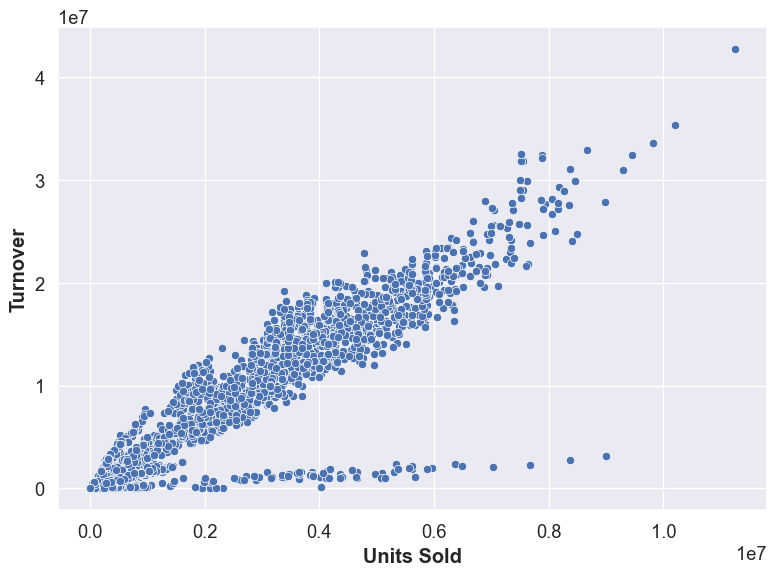

In [76]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.scatterplot(data = withoutzeros, x = 'sales_units', y = 'turnover_usd', palette = 'dark:#5A9_r', ax= ax)

plt.xlabel('Units Sold')
plt.ylabel('Turnover')

We will remove the turnover values under $5\cdot 10^6$ for the training because they are the minority

In [77]:
withoutzeros = withoutzeros[withoutzeros['turnover_usd'] > 5e6]

In [78]:
zeros = df_final[(df_final['turnover_usd'] == 0) & (df_final['sales_units'] != 0)][['sales_units']]

model = LinearRegression()
model.fit(withoutzeros[['sales_units']], withoutzeros['turnover_usd'])
correlation_coef, _ = pearsonr(withoutzeros['sales_units'], withoutzeros['turnover_usd'])

populated = model.predict(zeros)

C:\Users\mateo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


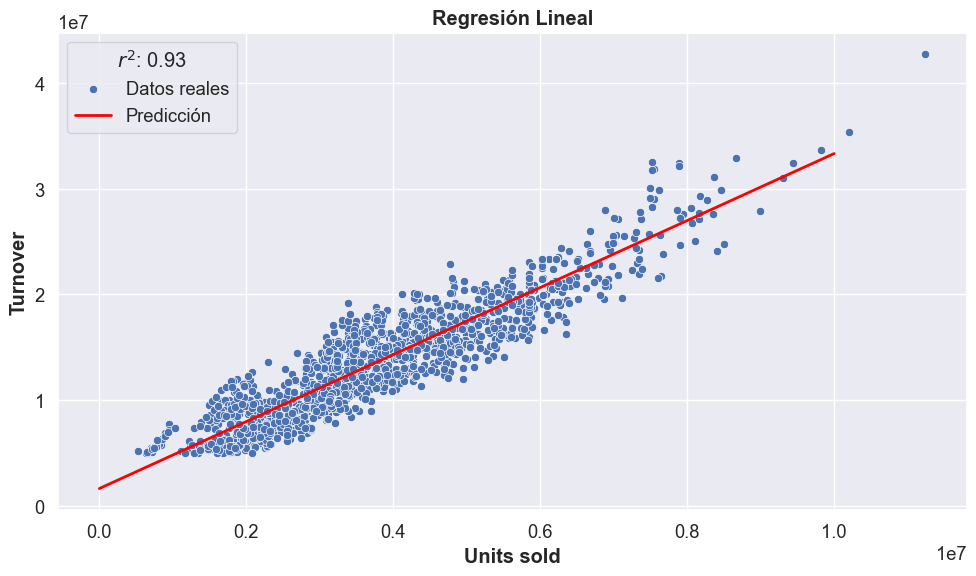

In [79]:
xpred = pd.DataFrame(np.linspace(0, 1e7, num=1000))
sns.scatterplot(data = withoutzeros, x = 'sales_units', y = 'turnover_usd', label = 'Datos reales')
plt.plot(xpred, model.predict(xpred), color='red', linewidth=2, label='Predicción')
plt.xlabel('Units sold')
plt.ylabel('Turnover')
plt.title('Regresión Lineal')
plt.legend(title= f'$r^2$: {correlation_coef:.2f}')
plt.show()

In [80]:
df_final.loc[(df_final['turnover_usd'] == 0) & (df_final['sales_units'] != 0), 'turnover_usd'] = populated.round()

____________________________________________________________________________________________________________________________________________________________________________________________________

In [81]:
df_final['totalhours'] = df_final['totalhours'].replace(0, np.nan)
df_final['sales_units'] = df_final['sales_units'].replace(0, np.nan)
df_final['turnover_usd'] = df_final['turnover_usd'].replace(0, np.nan)

In [82]:
df_final.isna().sum()

storeid             0
city                0
store_number        0
country             0
dept_name           0
hoursown            0
hourslease          0
totalhours        170
sales_units       157
turnover_usd      157
area_(m2)         306
opening_hours       0
hoursopened_pm      0
date                0
dtype: int64

Let's try to populate sales_units and turnover_usd using the totalhours field

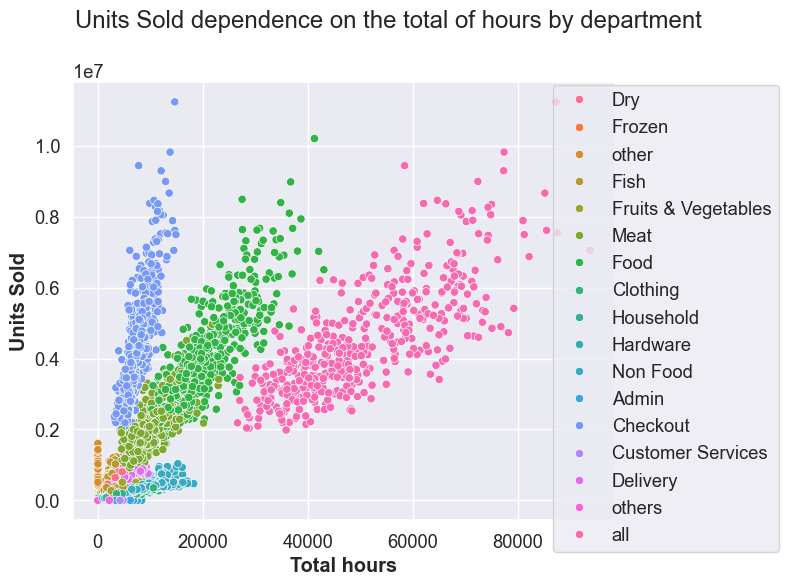

In [83]:
plt.figure(figsize = (8, 6))
sns.scatterplot(data = df_final, x = 'totalhours', y = 'sales_units', hue = 'dept_name')
plt.xlabel('Total hours')
plt.ylabel('Units Sold')
plt.suptitle('Units Sold dependence on the total of hours by department')
plt.legend(bbox_to_anchor = (1.32, 1.015), loc = 'upper right')

According to the previous graph, sales_units relationship with total hours is determinated by the department and it is still too scattered. Let's see sales-dept relationship in detail.

In [84]:
# Departments of our interest
df_studio = df_final[df_final['sales_units'].isna()]['dept_name'].unique()

# Distribution Study
df_final[df_final['dept_name'].isin(df_studio)].groupby('dept_name')['sales_units'].describe()

,count,mean,std,min,25%,50%,75%,max
dept_name,,,,,,,,
Admin,441.0,125.00000,70.790986,5.0,65.0,125.0,185.0,245.0
Customer Services,441.0,125.00000,70.790986,5.0,65.0,125.0,185.0,245.0
Delivery,320.0,385222.46875,255982.214406,5.0,215590.0,404512.5,552287.5,1094540.0
others,441.0,125.00000,70.790986,5.0,65.0,125.0,185.0,245.0


Text(0, 0.5, '')

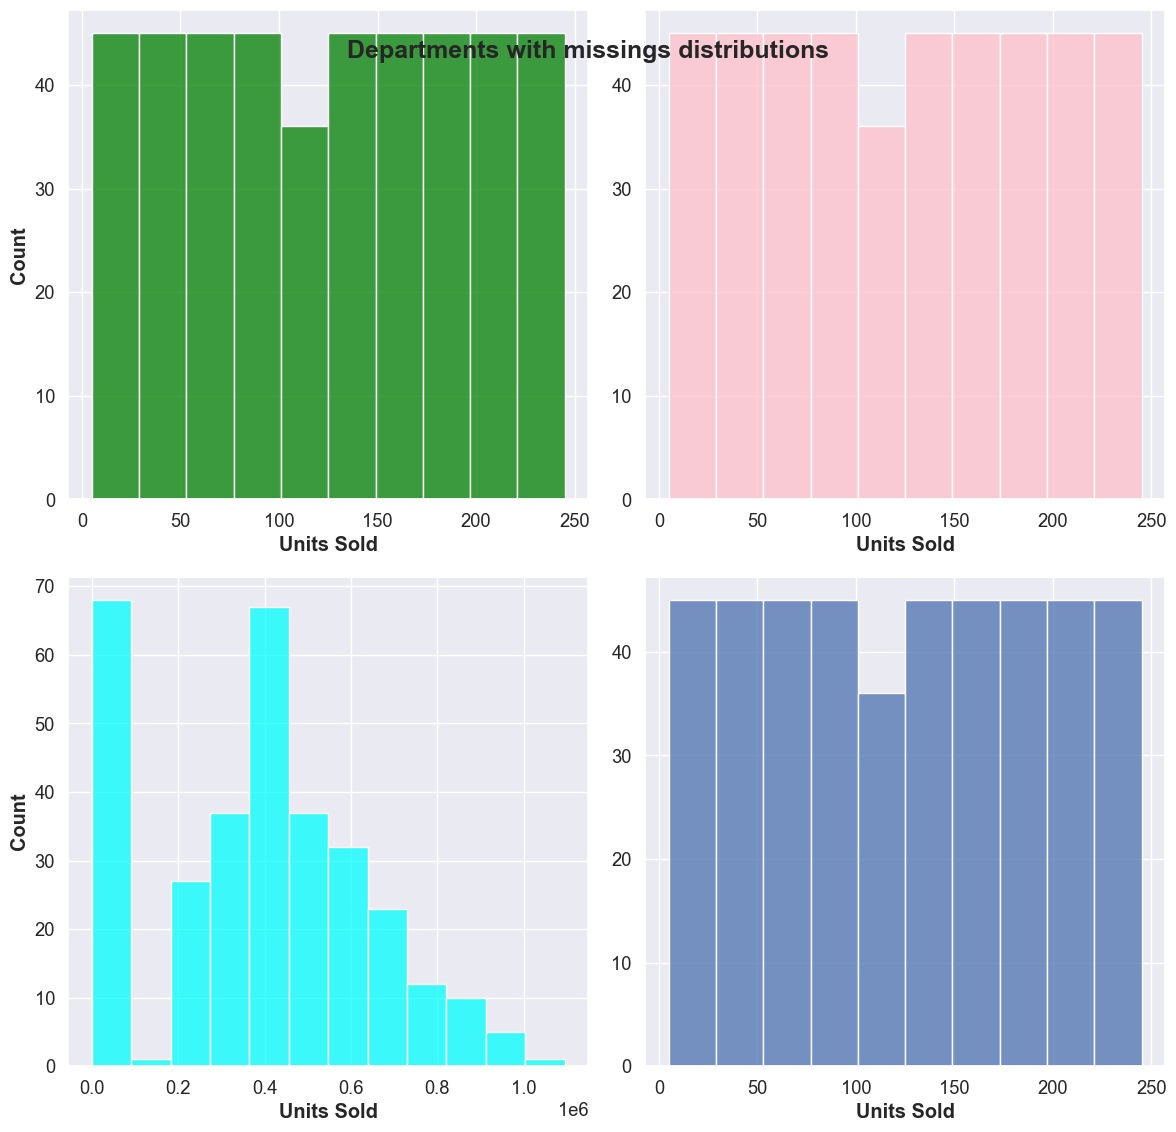

In [85]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (12, 12))

sns.histplot(data = df_final[df_final['dept_name'] == 'Admin'], x = 'sales_units', color = 'green', ax = ax1)
sns.histplot(data = df_final[df_final['dept_name'] == 'Customer Services'], x = 'sales_units', color = 'pink', ax = ax2)
sns.histplot(data = df_final[df_final['dept_name'] == 'Delivery'], x = 'sales_units', color = 'cyan', ax = ax3)
sns.histplot(data = df_final[df_final['dept_name'] == 'others'], x = 'sales_units', ax = ax4)

plt.suptitle('Departments with missings distributions', fontsize = 18, fontweight = 'bold', x = 0.5, y = 0.92)

ax1.set_xlabel('Units Sold')
ax2.set_xlabel('Units Sold')
ax3.set_xlabel('Units Sold')
ax4.set_xlabel('Units Sold')

ax1.set_ylabel('Count')
ax2.set_ylabel('')
ax3.set_ylabel('Count')
ax4.set_ylabel('')



'Admin', 'Customer Service' and 'others' are quasi-symmetric uniform distributions. Therefore, we will populate them with random numbers within the range.

In [86]:

min_value = df_final[df_final['dept_name'] == 'Admin']['sales_units'].min()
max_value = df_final[df_final['dept_name'] == 'Admin']['sales_units'].max()


df_final['sales_units'] = df_final.apply(
    lambda row: np.random.uniform(min_value, max_value) if pd.isnull(row['sales_units']) and row['dept_name'] != 'Delivery' else row['sales_units'],
    axis=1
)

In [87]:
df_final.isna().sum()/df_final.shape[0] * 100

storeid           0.000000
city              0.000000
store_number      0.000000
country           0.000000
dept_name         0.000000
hoursown          0.000000
hourslease        0.000000
totalhours        2.222222
sales_units       1.699346
turnover_usd      2.052288
area_(m2)         4.000000
opening_hours     0.000000
hoursopened_pm    0.000000
date              0.000000
dtype: float64

In [88]:
df_final = df_final.dropna(subset = 'totalhours')

In [89]:
zeros2 = df_final[(df_final['turnover_usd'].isna()) & (df_final['sales_units'].notna())][['sales_units']]

populated2 = model.predict(zeros2)

In [90]:
df_final.loc[(df_final['turnover_usd'].isna()) & (df_final['sales_units'].notna()), 'turnover_usd'] = populated2.round()

In [91]:
df_final.isna().sum()/df_final.shape[0] * 100

storeid           0.000000
city              0.000000
store_number      0.000000
country           0.000000
dept_name         0.000000
hoursown          0.000000
hourslease        0.000000
totalhours        0.000000
sales_units       0.360963
turnover_usd      0.360963
area_(m2)         3.850267
opening_hours     0.000000
hoursopened_pm    0.000000
date              0.000000
dtype: float64

The rest of the missings represent a 0.36% of the total so we are going to drop them

In [92]:
df_final = df_final.dropna(subset = 'sales_units').reset_index()

In [93]:
workers_hours = df_final[[ 'hoursown', 'hourslease', 'totalhours']]

In [94]:
df_final.rename(columns = {'storeid': 'Store ID', 'city': 'City', 'store_number': 'Store Number', 'country': 'Country', 'dept_name': 'Department Name',
                           'totalhours': 'Total Workers\' Hours', 'sales_units': 'Units Sold', 'turnover_usd': 'Turnover (USD)', 'area_(m2)': 'Area ($m^2$)',
                           'opening_hours': 'Opening Scheme', 'hoursopened_pm': 'Hours Per Month', 'date': 'Date'}, inplace = True)

In [95]:
df_final.head()

,index,Store ID,City,Store Number,Country,Department Name,hoursown,hourslease,Total Workers' Hours,Units Sold,Turnover (USD),Area ($m^2$),Opening Scheme,Hours Per Month,Date
0,0,88253,London,I,United Kingdom,Dry,3184.76,0,3184.76,398560.0,1226244.0,Medium,Type A,382,October 2016
1,1,88253,London,I,United Kingdom,Frozen,1582.94,0,1582.94,82725.0,387810.0,Medium,Type A,382,October 2016
2,2,88253,London,I,United Kingdom,other,47.20,0,47.20,438400.0,654657.0,Medium,Type A,382,October 2016
3,3,88253,London,I,United Kingdom,Fish,1623.85,0,1623.85,309425.0,499434.0,Medium,Type A,382,October 2016
4,4,88253,London,I,United Kingdom,Fruits & Vegetables,1759.17,0,1759.17,165515.0,329397.0,Medium,Type A,382,October 2016


With this, the dataset is relatively clean. 'df_final' would be the final dataframe, although we have created 'month_id', 'depts' and 'workers_hours' during the process, which may be useful for certain analyses.

To apply predictive data science models in this case, we would also need to do a bit more work to handle categorical variables.

Nevertheless, the dataset is free of null values, missing entries, gaps, inconsistencies, and disorganized information.

In [96]:
df_final.to_csv('retail_cleaned.csv', index = False)
depts.to_csv('depts.csv', index= False)
month_id.to_csv('month_id.csv', index = False)
workers_hours.to_csv('workers_hours.csv')